In [1]:
import pandas as pd
import multiprocessing
import gensim
from gensim.models import word2vec
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('cleaned_amazon_walmart_review.csv')
data = data.drop(data.columns[0], axis = 1)
data.head()

,date,title,review,score,author,cleaned_text
0,"May 4, 2019",This is very dangerous product ! Do not buy !,"I've been buying this product for a year, I ...",1.0,Dmitry,product year bought many times definetely give...
1,"September 17, 2018",Bug eggs in package?!!,Thsee don't expire until December. I opened ...,1.0,S A,thsee expire december opened today looks bug e...
2,"December 17, 2018",#1 on my list,The photo shows the seaweed brands I've trie...,5.0,Elisa S.,photo shows seaweed brands tried order prefere...
3,"July 23, 2017",Oily and stale,The first time I bought these I fell in love...,1.0,Ani_Mon,first time bought fell types seaweed snacks tr...
4,"February 4, 2017",The BEST seasoned seaweed makers in the WORLD,I ate the entire box in a week. This stuff i...,5.0,Rachel Humphrey,ate entire box week stuff delicious enjoy trad...


In [3]:
tokenized_doc = data['cleaned_text'].apply(lambda x : str(x).split())

## word2vec

In [5]:
# 문자 벡터 차원 수
num_features = 300 
# 최소 문자 수
min_word_count = 10 
# 병렬 처리 스레드 수
num_workers = multiprocessing.cpu_count()
# 문자열 창 크기
context_size = 5 
# seed 값
seed = 1

word2vec_model = word2vec.Word2Vec(tokenized_doc, 
                          seed = seed,
                          workers = num_workers, 
                          size = num_features, 
                          min_count = min_word_count,
                          window = context_size) 

In [9]:
import pprint

pprint.pprint(word2vec_model.wv.most_similar("snack"))

[('delicious', 0.9996256232261658),
 ('light', 0.9996166825294495),
 ('crispy', 0.9995891451835632),
 ('healthy', 0.9995018243789673),
 ('salty', 0.9994321465492249),
 ('crunchy', 0.9993982911109924),
 ('tasty', 0.9993726015090942),
 ('enjoyed', 0.999293327331543),
 ('texture', 0.9992893934249878),
 ('sheets', 0.9992730617523193)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [11]:
pprint.pprint(word2vec_model.wv.similarity("snack", "seaweed"))

0.9961818


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
word2vec_model.wv.most_similar("healthy")

[('something', 0.9996335506439209),
 ('tasty', 0.9996077418327332),
 ('kids', 0.9995740056037903),
 ('feel', 0.9994966983795166),
 ('delicious', 0.9994852542877197),
 ('flavorful', 0.9994574785232544),
 ('crisp', 0.9993689656257629),
 ('alternative', 0.9993689656257629),
 ('enjoy', 0.99933922290802),
 ('craving', 0.9993249177932739)]

In [ ]:
word2vec_model.wv.most_similar("calorie")

[('carb', 0.9997597336769104),
 ('calories', 0.9997102618217468),
 ('alternative', 0.9990901947021484),
 ('chips', 0.998920202255249),
 ('feel', 0.9988955855369568),
 ('eating', 0.9988943338394165),
 ('craving', 0.9988813400268555),
 ('easy', 0.9988723993301392),
 ('chip', 0.9988391399383545),
 ('eat', 0.99883633852005)]

In [ ]:
word2vec_model.wv.most_similar("family")

[('product', 0.9997678399085999),
 ('company,', 0.9997667670249939),
 ('recommended,', 0.9997611045837402),
 ('anyone,', 0.9997580051422119),
 ('home,', 0.9997580051422119),
 ('foods,', 0.9997573494911194),
 ('candy,', 0.9997571110725403),
 ('mix,', 0.9997556805610657),
 ('sugar,', 0.9997551441192627),
 ('able,', 0.9997543692588806)]

In [ ]:
word2vec_model.wv.most_similar("seasoning")

[('anything', 0.9999133348464966),
 ('added', 0.9999087452888489),
 ('expecting', 0.9999083876609802),
 ('hint', 0.9999080896377563),
 ('although', 0.9999079704284668),
 ('especially', 0.9999078512191772),
 ('plain', 0.9999077320098877),
 ('ok', 0.9999020099639893),
 ('glad', 0.9999006986618042),
 ('strong', 0.9998999834060669)]

In [ ]:
word2vec_model.wv.most_similar("sauce")

[('friend', 0.9998968839645386),
 ('top', 0.999889075756073),
 ('smell', 0.9998874068260193),
 ('probably', 0.9998839497566223),
 ('bite', 0.9998836517333984),
 ('extra', 0.9998835325241089),
 ('real', 0.9998829960823059),
 ('company', 0.999882161617279),
 ('gave', 0.999880850315094),
 ('tongue', 0.9998800158500671)]

In [ ]:
word2vec_model.wv.most_similar("bland")

[('able', 0.9999107718467712),
 ('might', 0.9999068379402161),
 ('rest', 0.9999065399169922),
 ('care', 0.9999063014984131),
 ('see', 0.9999058842658997),
 ('either', 0.9999029040336609),
 ('natural', 0.99989914894104),
 ('compared', 0.9998979568481445),
 ('thanks', 0.9998970627784729),
 ('soon', 0.9998915195465088)]

In [ ]:
print("word2vec vocabulary length: ", len(word2vec_model.wv.vocab))

word2vec vocabulary length:  1097


In [ ]:
# word2vec matrix

from __future__ import absolute_import, division, print_function
import numpy as np

count = 1000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float64')
word_list = []
i = 0
for word in word2vec_model.wv.vocab:
    word_vectors_matrix[i] = word2vec_model.wv[word]
    word_list.append(word)
    i = i+1
    if i == count:
        break
print("word_vectors_matrix shape is ", word_vectors_matrix.shape)

word_vectors_matrix shape is  (1000, 300)


In [ ]:
# 2d로 차원 축소

import sklearn.manifold

tsne = sklearn.manifold.TSNE(n_components=2, init = 'pca', n_iter = 3500, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is ", word_vectors_matrix_2d.shape)

word_vectors_matrix_2d shape is  (1000, 2)


In [ ]:
# 시각화

points = pd.DataFrame(
            [(word, coords[0], coords[1])
            for word, coords in [
                (word, word_vectors_matrix_2d[word_list.index(word)])
                for word in word_list
            ]],
            columns = ['word', 'x', 'y'])

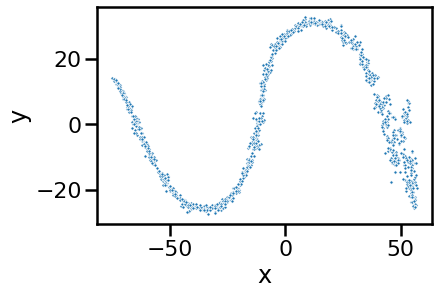

In [ ]:
sns.set_context('poster')
sns.scatterplot("x", "y", s=10, data = points)

## doc2vec

In [ ]:
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

data_for_training = list(tagged_document(tokenized_doc))

In [ ]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(data_for_training)
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
import pprint

pprint.pprint(model.most_similar('smell', topn = 20))

[('strong', 0.8171805143356323),
 ('listerine', 0.8159648776054382),
 ('smells', 0.8109418749809265),
 ('aftertaste', 0.8098933696746826),
 ('rotten', 0.8046903014183044),
 ('fishy', 0.8020117282867432),
 ('slimy', 0.8015314340591431),
 ('tolerable', 0.797583818435669),
 ('expecting', 0.7795684337615967),
 ('slight', 0.7690850496292114),
 ('tank', 0.7667655944824219),
 ('strip', 0.7659953832626343),
 ('surprising', 0.7632037401199341),
 ('smelled', 0.7631746530532837),
 ('algae', 0.7552775740623474),
 ('fish', 0.7547566890716553),
 ('dead', 0.7494936585426331),
 ('chewed', 0.7438415288925171),
 ('unpleasant', 0.7416676878929138),
 ('jalapenos', 0.7386263608932495)]


<ipython-input-37-0526a30197e3>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  pprint.pprint(model.most_similar('smell', topn = 20))


In [ ]:
pprint.pprint(model.most_similar('kids', topn = 20))

[('mom', 0.7540568709373474),
 ('son', 0.7525215744972229),
 ('enjoyed', 0.7313751578330994),
 ('husband', 0.7275371551513672),
 ('school', 0.7225245237350464),
 ('daughter', 0.7135893106460571),
 ('everyday', 0.6962844729423523),
 ('oldest', 0.6959844827651978),
 ('lunchbox', 0.689898669719696),
 ('meals', 0.6821081638336182),
 ('picky', 0.6638772487640381),
 ('go', 0.6615709662437439),
 ('lunches', 0.6593438386917114),
 ('children', 0.6582463383674622),
 ('grand', 0.6411305069923401),
 ('quick', 0.6407104134559631),
 ('salsa', 0.6389244794845581),
 ('enjoy', 0.6386668682098389),
 ('grabbed', 0.6332473754882812),
 ('choice', 0.6252319812774658)]


<ipython-input-38-160adb500d7c>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  pprint.pprint(model.most_similar('kids', topn = 20))


In [ ]:
pprint.pprint(model.most_similar('grandkids', topn = 20))

[('sand', 0.9491410255432129),
 ('neighbor', 0.9477165341377258),
 ('camping', 0.9436079859733582),
 ('preschool', 0.9424842596054077),
 ('road', 0.9392344951629639),
 ('sleep', 0.9356191158294678),
 ('somthing', 0.9355154633522034),
 ('grandchildren', 0.9331419467926025),
 ('grandson', 0.9307022094726562),
 ('create', 0.9292557239532471),
 ('celiac', 0.9287585020065308),
 ('yogurt', 0.9229078888893127),
 ('areas', 0.9215516448020935),
 ('claimed', 0.9203029870986938),
 ('rare', 0.9183477163314819),
 ('teacher', 0.9181092381477356),
 ('doritos', 0.9173084497451782),
 ('zoom', 0.9172885417938232),
 ('fir', 0.9165202975273132),
 ('trips', 0.916465699672699)]


<ipython-input-40-56bc46aeb38b>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  pprint.pprint(model.most_similar('grandkids', topn = 20))


In [ ]:
pprint.pprint(model.most_similar('seasoning', topn = 20))

[('adds', 0.9109240174293518),
 ('mild', 0.9016361236572266),
 ('flavoring', 0.8714820742607117),
 ('spiciness', 0.8698405027389526),
 ('alternate', 0.8583585619926453),
 ('sriracha', 0.8562909960746765),
 ('heat', 0.8532163500785828),
 ('kick', 0.8514679670333862),
 ('tangy', 0.8459146022796631),
 ('coated', 0.8456489443778992),
 ('slight', 0.8446094989776611),
 ('subtle', 0.8437792658805847),
 ('touch', 0.8357448577880859),
 ('gorging', 0.8328093886375427),
 ('burn', 0.8306885361671448),
 ('overwhelming', 0.8296059370040894),
 ('stronger', 0.820958137512207),
 ('peas', 0.8192192316055298),
 ('pleasant', 0.8174291253089905),
 ('pairs', 0.8168750405311584)]


<ipython-input-39-33764e53ef24>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  pprint.pprint(model.most_similar('seasoning', topn = 20))


## 추가 품사 부착 코드

In [ ]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

tagged_list = []

for t in tokenized_doc:
    tagged_list.append(pos_tag(t))

In [ ]:
pos_tag = pd.DataFrame({'tagged_list': tagged_list})
pos_tag.head()

,tagged_list
0,"[(product, NN), (year, NN), (bought, VBD), (ma..."
1,"[(thsee, NN), (expire, NN), (december, NN), (o..."
2,"[(photo, NN), (shows, NNS), (seaweed, VBP), (b..."
3,"[(first, JJ), (time, NN), (bought, VBN), (fell..."
4,"[(ate, NN), (entire, JJ), (box, NN), (week, NN..."
